In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
import processing_signals as ps
import padasip as pa

# plt.figure(figsize=(10, 7))

In [2]:
model = np.load("MODEL.NPY")
model_agc = np.load("MODEL_AGC.NPY")
gather = np.load("GATHER.NPY")

print(model.shape, model_agc.shape, gather.shape)

(96, 2001) (96, 2001) (96, 2001)


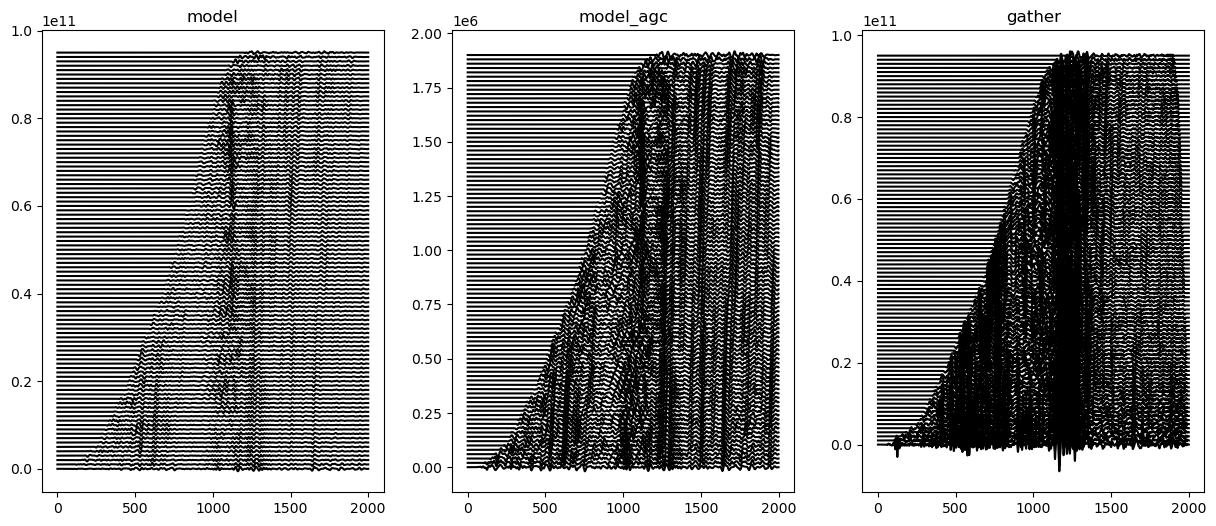

In [3]:
plt.figure(figsize=(15, 6))


shift = 1e+9
plt.subplot(1, 3, 1)
plt.title("model")
for i in range(96):
    plt.plot(shift * i + model[i], color='black')

shift_agc = 1e+5 / 5
plt.subplot(1, 3, 2)
plt.title("model_agc")
for i in range(96):
    plt.plot(shift_agc * i + model_agc[i], color='black')


plt.subplot(1, 3, 3)
plt.title("gather")
for i in range(96):
    plt.plot(shift * i + gather[i], color='black')

plt.show()

Для примера возьмем конкретную трассу

При некоторых значения, например number_trace = 2, хоть RLS и дает более верный сигнал на выходе, но NMSE у него хуже

In [4]:
number_trace = 2

# Мой NLMS метод:

In [5]:
approx_real_weights_1d_nlms = ps.fitting_of_weights(model_agc[number_trace], gather[number_trace], 2, 0.9)
print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

[ 398184.94392703 -655631.84171327] (2,)


In [6]:
approx_real_signal_1d_nlms = ps.processing_of_signal(model_agc[number_trace], approx_real_weights_1d_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_nlms, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 3.0891678033e+18
ME = 1.3578545920e+09


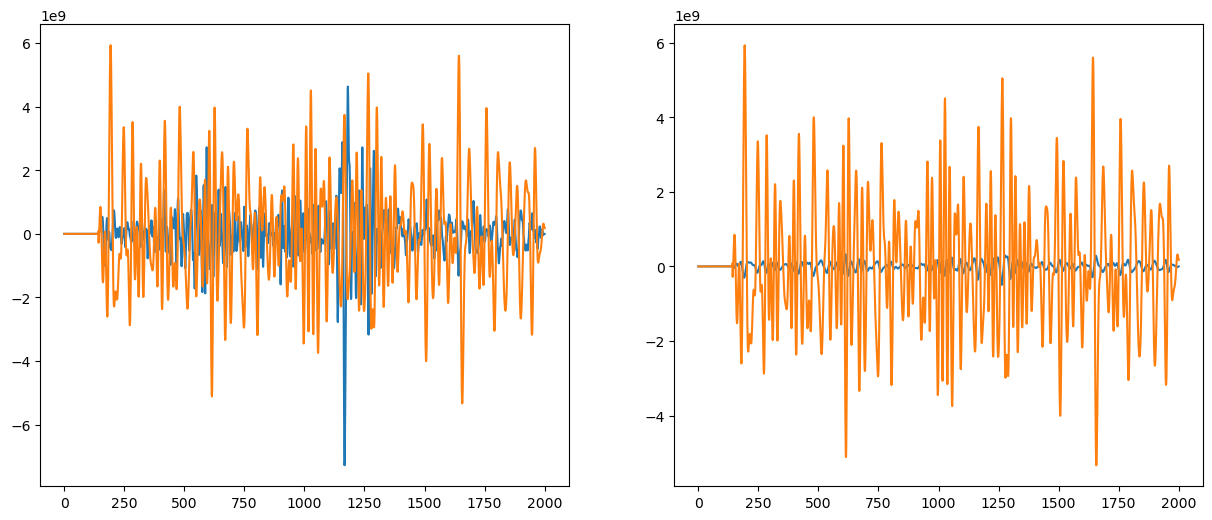

In [7]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_nlms)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_nlms)


plt.show()

# Мой RLS метод:

In [8]:
approx_real_weights_1d_rls = ps.RLS(model_agc[number_trace], gather[number_trace], 2, 0.99)
print(approx_real_weights_1d_rls, approx_real_weights_1d_rls.shape)

[[109850.61035878]
 [-77417.24721514]] (2, 1)


In [9]:
approx_real_signal_1d_rls = ps.processing_of_signal(model_agc[number_trace], approx_real_weights_1d_rls.flatten())

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_rls, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 2.1247460911e+16
ME = 1.1132209600e+08


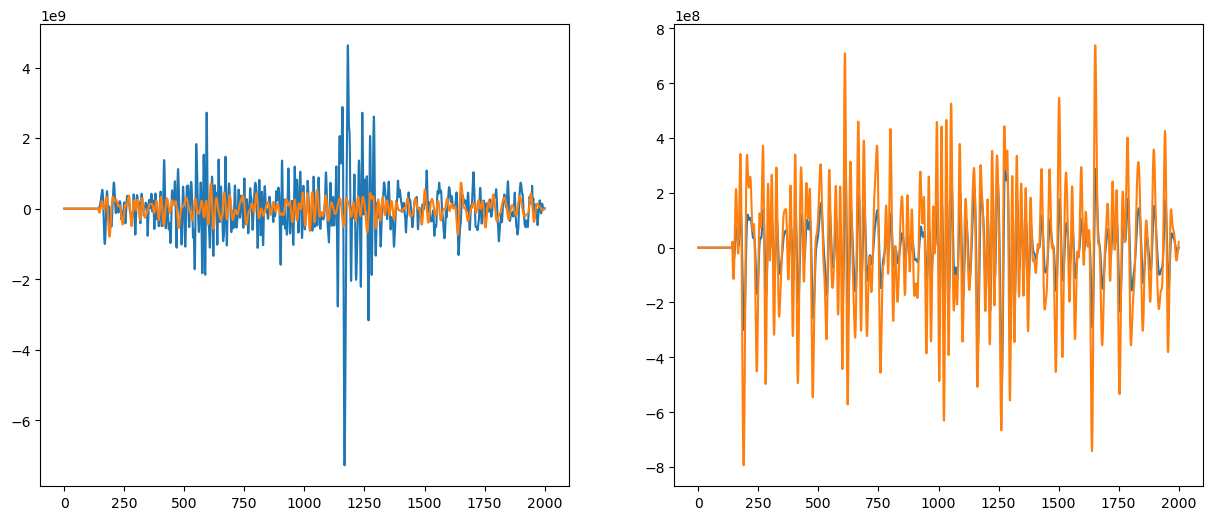

In [10]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_rls)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_rls)


plt.show()

# Padasip NLMS метод:

In [11]:
number_of_weights_p_nlms = 2

In [12]:
first_input_1d = pa.input_from_history(model_agc[number_trace], number_of_weights_p_nlms)
second_input_1d = gather[number_trace]

In [13]:
f = pa.filters.FilterNLMS(n=number_of_weights_p_nlms, mu=1.1, w="zeros")
y, e, w = f.run(second_input_1d[:-1], first_input_1d)

In [14]:
approx_weights_1d_p_nlms = w[-1]
print(approx_weights_1d_p_nlms)

[-173126.98585552  282675.56805758]


In [15]:
approx_real_signal_1d_p_nlms = ps.processing_of_signal(model_agc[number_trace], approx_weights_1d_p_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_p_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_nlms, model[number_trace]):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_p_nlms, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_p_nlms, model[number_trace]):.10e}")

(2001,) (2,)
MSE = 3.9518526666e+17
ME = 4.8592105600e+08


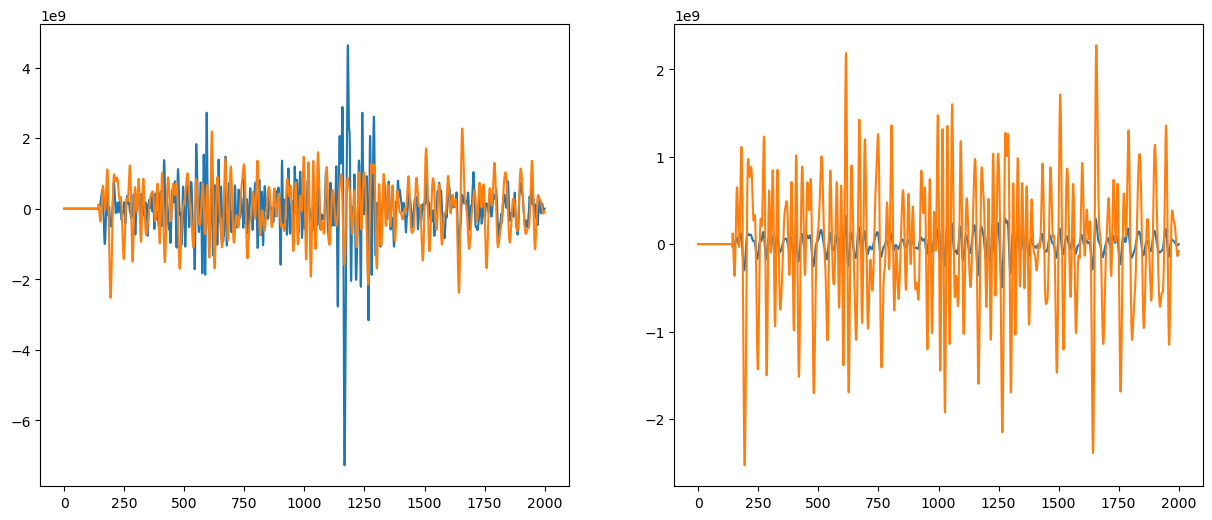

In [16]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_p_nlms)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_p_nlms)


plt.show()

# Padasip RLS метод:

In [17]:
number_of_weights_p_rls = 2

In [18]:
f = pa.filters.FilterRLS(n=number_of_weights_p_rls, mu=0.99, w="zeros")
y, e, w = f.run(second_input_1d[:-1], first_input_1d)

In [19]:
approx_weights_1d_p_rls = w[-1]
print(approx_weights_1d_p_rls)

[ 131453.36683404 -102668.03106219]


In [20]:
approx_real_signal_1d_p_rls = ps.processing_of_signal(model_agc[number_trace], approx_weights_1d_p_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_p_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_p_rls, model[number_trace]):.1e}") 
print(f"ME = {ps.ME(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")

(2001,) (2,)
MSE = 2.530434528523059e+16
ME = 1.210082320000000e+08


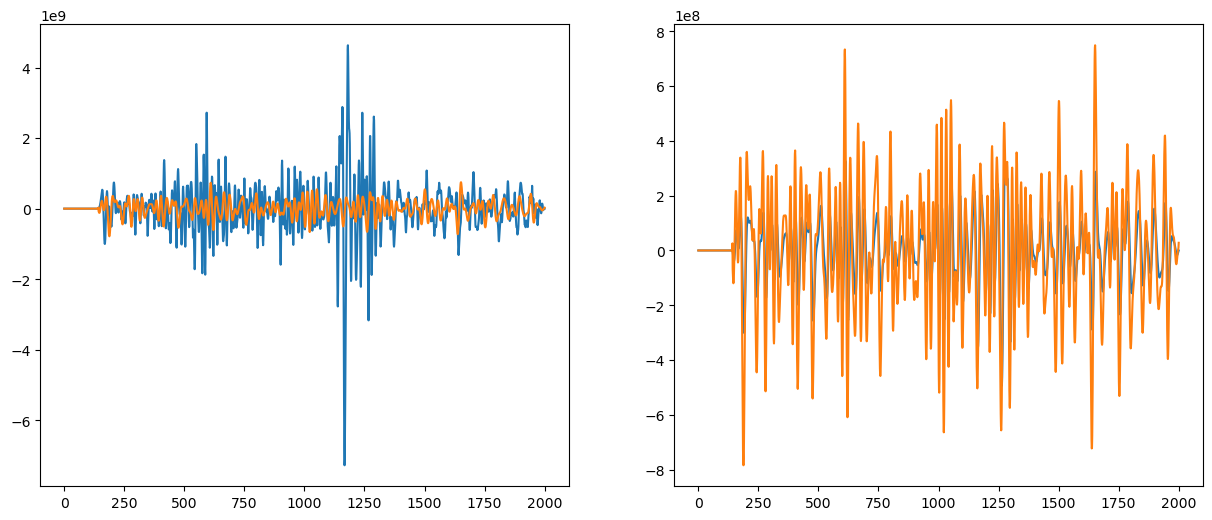

In [21]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(approx_real_signal_1d_p_rls)

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_p_rls)


plt.show()

# Общие выводы

In [22]:
print("My NLMS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model[number_trace]):.15e}")
print(f"ME = {ps.ME(approx_real_signal_1d_nlms, model[number_trace]):.15e}")
print("Padasip NLMS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_nlms, model[number_trace]):.15e}")
print(f"ME = {ps.ME(approx_real_signal_1d_p_nlms, model[number_trace]):.15e}")
print("My RLS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model[number_trace]):.15e}")
print(f"ME = {ps.ME(approx_real_signal_1d_rls, model[number_trace]):.15e}")
print("Padasip RLS")
print(f"MSE = {ps.MSE(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")
print(f"ME = {ps.ME(approx_real_signal_1d_p_rls, model[number_trace]):.15e}")

My NLMS
MSE = 3.089167803312243e+18
ME = 1.357854592000000e+09
Padasip NLMS
MSE = 3.951852666644070e+17
ME = 4.859210560000000e+08
My RLS
MSE = 2.124746091134976e+16
ME = 1.113220960000000e+08
Padasip RLS
MSE = 2.530434528523059e+16
ME = 1.210082320000000e+08
